In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [14]:
ipl = pd.read_csv('C:\\Users\\Ayush\\OneDrive\\Documents\\bhoomi\\ipl_2022_dataset.csv')
ipl.head()

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


In [15]:
ipl.shape

(633, 8)

In [8]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       633 non-null    int64  
 1   Player           633 non-null    object 
 2   Base Price       633 non-null    object 
 3   TYPE             633 non-null    object 
 4   COST IN ₹ (CR.)  237 non-null    float64
 5   Cost IN $ (000)  237 non-null    float64
 6   2021 Squad       199 non-null    object 
 7   Team             633 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 39.7+ KB


In [16]:
ipl.columns

Index(['Unnamed: 0', 'Player', 'Base Price', 'TYPE', 'COST IN ₹ (CR.)',
       'Cost IN $ (000)', '2021 Squad', 'Team'],
      dtype='object')

In [27]:
ipl.isnull().sum()

Player               0
Base Price           0
TYPE                 0
COST IN ₹ (CR.)    396
Cost IN $ (000)    396
2021 Squad         434
Team                 0
dtype: int64

In [25]:
ipl[ipl['Cost IN $ (000)'].isnull()]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
237,Suresh Raina,2 Cr,BATTER,NaN,NaN,CSK,Unsold
238,Steve Smith,2 Cr,BATTER,NaN,NaN,DC,Unsold
239,Shakib Al Hasan,2 Cr,ALL-ROUNDER,NaN,NaN,KKR,Unsold
240,Amit Mishra,1.5 Cr,BOWLER,NaN,NaN,DC,Unsold
241,Adil Rashid,2 Cr,BOWLER,NaN,NaN,PBKS,Unsold
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold


In [28]:
ipl['COST IN ₹ (CR.)']=ipl['COST IN ₹ (CR.)'].fillna(0)
ipl['Cost IN $ (000)']=ipl['Cost IN $ (000)'].fillna(0)

In [30]:
ipl[ipl['2021 Squad'].isnull()]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
6,Yash Dayal,20 Lakh,BOWLER,3.2,416.0,NaN,Gujarat Titans
9,Abhinav Sadarangani,20 Lakh,BATTER,2.6,338.0,NaN,Gujarat Titans
10,Matthew Wade,2 Cr,WICKETKEEPER,2.4,312.0,NaN,Gujarat Titans
11,Alzarri Joseph,75 Lakh,BOWLER,2.4,312.0,NaN,Gujarat Titans
17,Varun Aaron,50 Lakh,BOWLER,0.5,65.0,NaN,Gujarat Titans
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold


In [34]:
ipl['2021 Squad']=ipl['2021 Squad'].fillna('Not Participated')
ipl.isnull().sum()

Player             0
Base Price         0
TYPE               0
COST IN ₹ (CR.)    0
Cost IN $ (000)    0
2021 Squad         0
Team               0
dtype: int64

In [36]:
team=ipl[ipl['COST IN ₹ (CR.)']>0]['Team'].unique()
team

array(['Gujarat Titans', 'Chennai Super Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Punjab Kings', 'Lucknow Super Giants',
       'Mumbai Indians', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Sunrisers Hyderabad'], dtype=object)

In [38]:
ipl['status']=ipl['Team'].replace(team,'sold')
ipl

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold
...,...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,Not Participated,Unsold,Unsold
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold


In [39]:
ipl[ipl['Player'].duplicated(keep=False)]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status
62,Lalit Yadav,20 Lakh,ALL-ROUNDER,0.65,84.5,DC,Delhi Capitals,sold
240,Amit Mishra,1.5 Cr,BOWLER,0.00,0.0,DC,Unsold,Unsold
499,Amit Mishra,20 Lakh,BOWLER,0.00,0.0,Not Participated,Unsold,Unsold
518,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.0,Not Participated,Unsold,Unsold
530,Lalit Yadav,20 Lakh,BOWLER,0.00,0.0,Not Participated,Unsold,Unsold
537,Shubham Singh,20 Lakh,ALL-ROUNDER,0.00,0.0,Not Participated,Unsold,Unsold
544,Shubham Singh,20 Lakh,BOWLER,0.00,0.0,Not Participated,Unsold,Unsold
569,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.0,Not Participated,Unsold,Unsold


In [40]:
#how many players have participated in 2022 IPL auction?

ipl.shape[0]

633

In [42]:
#how many types of players have participated?

types = ipl['TYPE'].value_counts()
types.reset_index()

,TYPE,count
0,ALL-ROUNDER,242
1,BOWLER,215
2,BATTER,112
3,WICKETKEEPER,64


[]

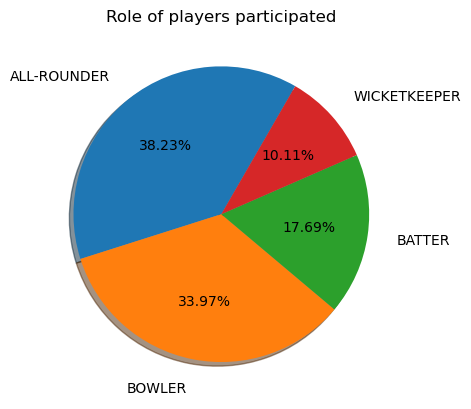

In [45]:
#as per above info make pai chart for clear understanding

plt.pie(types.values, labels=types.index, labeldistance=1.2,autopct='%1.2f%%',shadow=True, startangle=60)
plt.title('Role of players participated', fontsize = 12)
plt.plot()

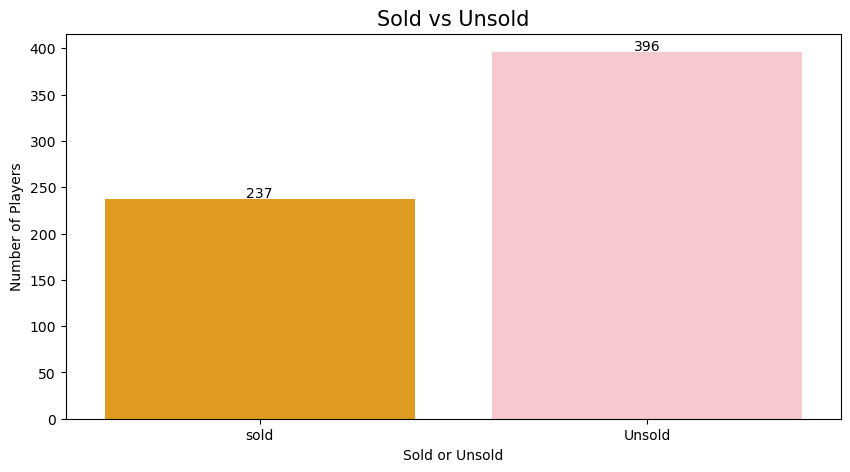

In [55]:
#players sold and unsold using a bar graph

plt.figure(figsize=(10,5))
fig = sns.countplot(data=ipl, x='status', palette=['Orange', 'Pink'])
plt.xlabel('Sold or Unsold')
plt.ylabel('Number of Players')
plt.title('Sold vs Unsold', fontsize=15)

for p in fig.patches:
    fig.annotate(format(p.get_height(), '0.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', xytext=(0, 4), textcoords='offset points')

plt.show()


In [56]:
ipl.groupby('status')['Player'].count()

status
Unsold    396
sold      237
Name: Player, dtype: int64

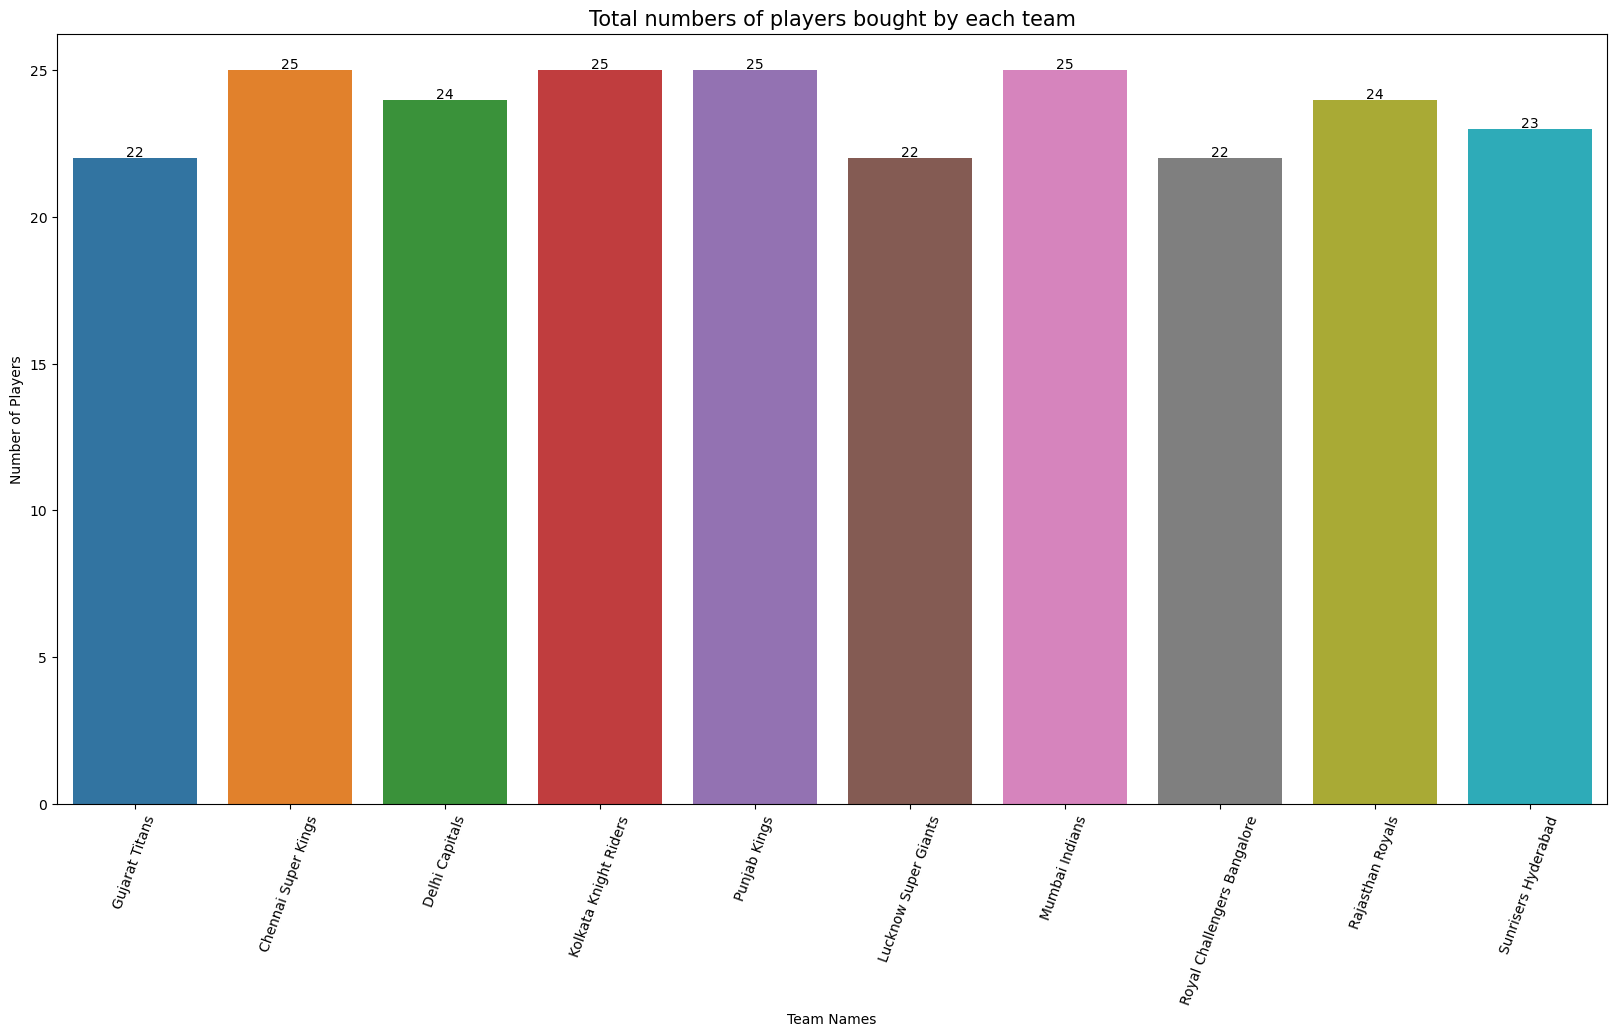

In [59]:
#Total numbers of players bought by each team

plt.figure(figsize=(20,10))
fig = sns.countplot(data=ipl[ipl['Team']!='Unsold'], x='Team')
plt.xlabel('Team Names')
plt.ylabel('Number of Players')
plt.title('Total numbers of players bought by each team', fontsize=15)
plt.xticks(rotation=70)

for p in fig.patches:
    fig.annotate(format(p.get_height(), '0.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', xytext=(0, 4), textcoords='offset points')

plt.show()


In [60]:
ipl['retention'] = ipl['Base Price']

In [61]:
ipl['retention'].replace(['2 Cr','40 Lakh', '20 Lakh', '1Cr', '75 Lakh', '50 Lakh', '30 Lakh','1.5cr'],'From Auction', inplace = True)

In [62]:
#Treating Base Price 

ipl['Base Price'].replace('Draft Pick',0, inplace = True)

In [63]:
ipl['base_price_unit']=ipl['Base Price'].apply(lambda x: str(x).split(' ')[-1])
ipl['base_price']=ipl['Base Price'].apply(lambda x: str(x).split(' ')[0])

In [64]:
ipl['base_price'].replace('Retained',0,inplace = True)

In [65]:
ipl.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price_unit,base_price
0,Rashid Khan,0,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold,Draft Pick,0,0
1,Hardik Pandya,0,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold,Draft Pick,0,0
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold,From Auction,Cr,2
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold,From Auction,Lakh,40
4,Shubman Gill,0,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold,Draft Pick,0,0


In [67]:
# Total players retained and bought 

ipl.groupby(['Team','retention'])['retention'].count()[:-1]

Team                         retention   
Chennai Super Kings          1 Cr             2
                             1.5 Cr           1
                             From Auction    18
                             Retained         4
Delhi Capitals               1 Cr             1
                             From Auction    19
                             Retained         4
Gujarat Titans               1 Cr             3
                             Draft Pick       3
                             From Auction    16
Kolkata Knight Riders        1 Cr             3
                             1.5 Cr           2
                             From Auction    16
                             Retained         4
Lucknow Super Giants         1 Cr             1
                             1.5 Cr           1
                             Draft Pick       3
                             From Auction    17
Mumbai Indians               1 Cr             3
                             From Auction    1

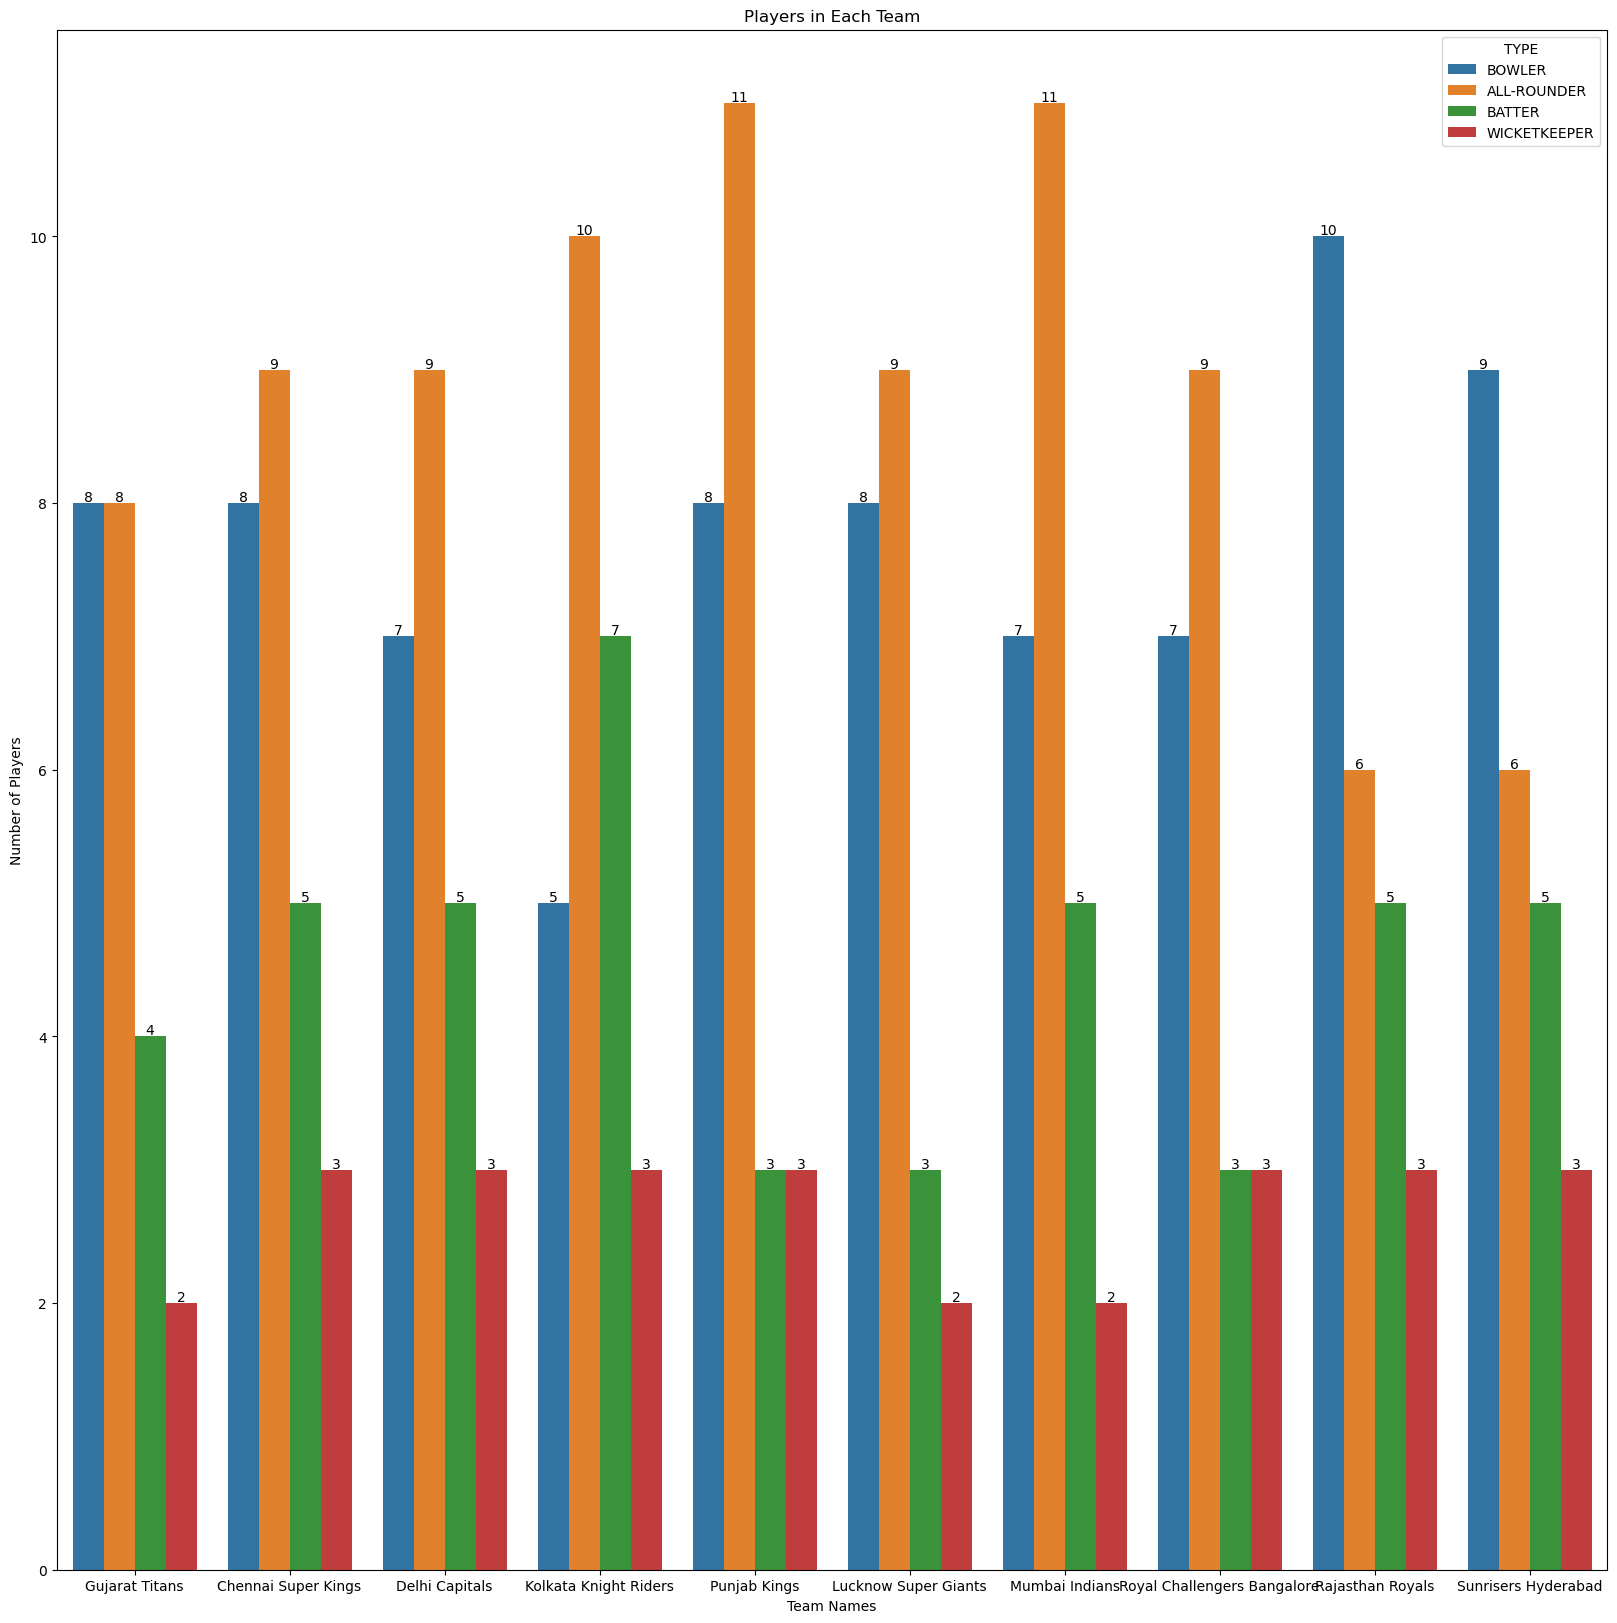

In [69]:
plt.figure(figsize=(20,20))
fig = sns.countplot(data=ipl[ipl['Team'] != 'Unsold'], x='Team', hue='TYPE')
plt.title('Players in Each Team')
plt.xlabel('Team Names')
plt.ylabel('Number of Players')

for p in fig.patches:
    fig.annotate(format(p.get_height(), '0.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', xytext=(0, 4), textcoords='offset points')

plt.show()


In [71]:
#Highest amount spent on a single player by each team

ipl[ipl['retention']=='From Auction'].groupby(['Team'])['COST IN ₹ (CR.)'].max()[:-1].sort_values(ascending=False)

Team
Mumbai Indians                 15.25
Chennai Super Kings            14.00
Kolkata Knight Riders          12.25
Delhi Capitals                 10.75
Royal Challengers Bangalore    10.75
Gujarat Titans                 10.00
Lucknow Super Giants           10.00
Punjab Kings                    9.25
Sunrisers Hyderabad             8.50
Rajasthan Royals                8.00
Name: COST IN ₹ (CR.), dtype: float64

In [75]:
#Player retained at maximum price 

ipl[ipl['retention']=='Retained'].sort_values(by='COST IN ₹ (CR.)',ascending= False).head(1)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price_unit,base_price
22,Ravindra Jadeja,Retained,ALL-ROUNDER,16.0,2080.0,CSK,Chennai Super Kings,sold,Retained,Retained,0


In [77]:
#top 5 bowlers 

ipl[(ipl['retention']=='From Auction') &(ipl['TYPE']=='BOWLER')].sort_values(by='COST IN ₹ (CR.)',ascending = False)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price_unit,base_price
23,Deepak Chahar,2 Cr,BOWLER,14.00,1820.0,CSK,Chennai Super Kings,sold,From Auction,Cr,2
48,Shardul Thakur,2 Cr,BOWLER,10.75,1397.5,CSK,Delhi Capitals,sold,From Auction,Cr,2
2,Lockie Ferguson,2 Cr,BOWLER,10.00,1300.0,KKR,Gujarat Titans,sold,From Auction,Cr,2
122,Avesh Khan,20 Lakh,BOWLER,10.00,1300.0,DC,Lucknow Super Giants,sold,From Auction,Lakh,20
98,Kagiso Rabada,2 Cr,BOWLER,9.25,1202.5,DC,Punjab Kings,sold,From Auction,Cr,2
...,...,...,...,...,...,...,...,...,...,...,...
347,Saqib Mahmood,2 Cr,BOWLER,0.00,0.0,Not Participated,Unsold,Unsold,From Auction,Cr,2
346,Dhawal Kulkarni,75 Lakh,BOWLER,0.00,0.0,MI,Unsold,Unsold,From Auction,Lakh,75
345,Marchant De Lange,2 Cr,BOWLER,0.00,0.0,Not Participated,Unsold,Unsold,From Auction,Cr,2
326,Midhun Sudhesan,20 Lakh,BOWLER,0.00,0.0,Not Participated,Unsold,Unsold,From Auction,Lakh,20


In [79]:
# Top 5 Batter 

ipl[(ipl['retention']=='From Auction') &(ipl['TYPE']=='BATTER')].sort_values(by='COST IN ₹ (CR.)',ascending = False)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),Prev_team,Team,status,retention,base_price_unit,base_price
71,Shreyas Iyer,2 Cr,BATTER,12.25,1592.5,DC,Kolkata Knight Riders,sold,From Auction,Cr,2
217,Rahul Tripathi,40 Lakh,BATTER,8.50,1105.0,KKR,Sunrisers Hyderabad,sold,From Auction,Lakh,40
100,Shikhar Dhawan,2 Cr,BATTER,8.25,1072.5,DC,Punjab Kings,sold,From Auction,Cr,2
195,Devdutt Padikkal,2 Cr,BATTER,7.75,1007.5,RCB,Rajasthan Royals,sold,From Auction,Cr,2
173,Faf Du Plessis,2 Cr,BATTER,7.00,910.0,CSK,Royal Challengers Bangalore,sold,From Auction,Cr,2
...,...,...,...,...,...,...,...,...,...,...,...
332,Paul Stirling,50 Lakh,BATTER,0.00,0.0,Not Participated,Unsold,Unsold,From Auction,Lakh,50
333,Hanuma Vihari,50 Lakh,BATTER,0.00,0.0,Not Participated,Unsold,Unsold,From Auction,Lakh,50
334,James Vince,2 Cr,BATTER,0.00,0.0,Not Participated,Unsold,Unsold,From Auction,Cr,2
335,Hazratullah Zazai,50 Lakh,BATTER,0.00,0.0,Not Participated,Unsold,Unsold,From Auction,Lakh,50


In [88]:
ipl = ipl.rename(columns={'2021 Squad':'Prev_team'})
unsold_players = ipl[(ipl.Prev_team != 'No Participated') & (ipl.Team == 'Unsold')][['Player','Prev_team']]
print(unsold_players)


                     Player         Prev_team
237            Suresh Raina               CSK
238             Steve Smith                DC
239         Shakib Al Hasan               KKR
240             Amit Mishra                DC
241             Adil Rashid              PBKS
..                      ...               ...
628            Sairaj Patil  Not Participated
629              Monu Singh  Not Participated
630  Nivethan Radhakrishnan  Not Participated
631            Lance Morris  Not Participated
632            Aaron Hardie  Not Participated

[396 rows x 2 columns]
